In [1]:
# Customer Behavior Prediction
# Classify customers as 'bargain hunters' or 'premium buyers' using purchase history.

First 5 rows of the dataset:
   total_spent  avg_purchase_value  visits_per_month      buyer_type
0  4007.982067          235.560678                 3  bargain_hunter
1  3117.968387          313.883912                13  bargain_hunter
2  4232.062646          122.280804                15  bargain_hunter
3   577.820196          470.747406                20   premium_buyer
4  2839.005107           23.207422                19  bargain_hunter

Missing values:
total_spent           0
avg_purchase_value    0
visits_per_month      0
buyer_type            0
dtype: int64

Confusion Matrix:
[[11  1]
 [ 8  0]]

Classification Report:
                precision    recall  f1-score   support

Bargain Hunter       0.58      0.92      0.71        12
 Premium Buyer       0.00      0.00      0.00         8

      accuracy                           0.55        20
     macro avg       0.29      0.46      0.35        20
  weighted avg       0.35      0.55      0.43        20



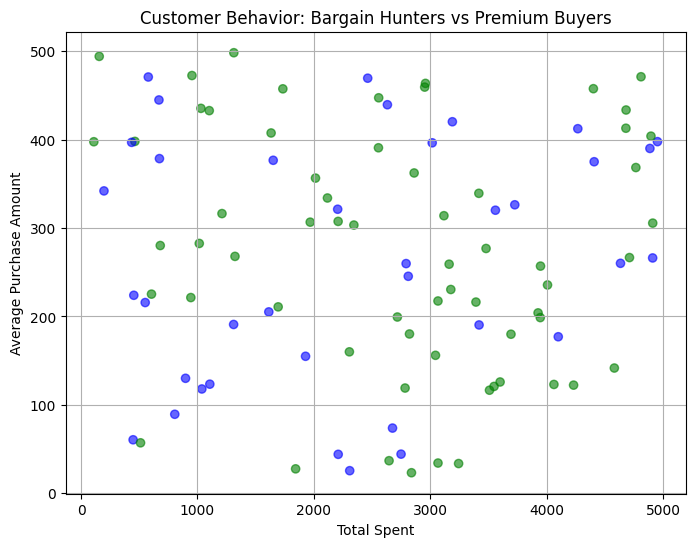

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# --------------------------------------------
# Step 1: Load the dataset
# --------------------------------------------


data = pd.read_csv('/content/customer_behavior.csv')

print("First 5 rows of the dataset:")
print(data.head())

# --------------------------------------------
# Step 2: Preprocessing
# --------------------------------------------

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Define features and label
X = data[['total_spent', 'avg_purchase_value', 'visits_per_month']]  # Features
y = data['buyer_type']                                # Target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --------------------------------------------
# Step 3: Train a logistic regression model
# --------------------------------------------

model = LogisticRegression()
model.fit(X_train, y_train)

# --------------------------------------------
# Step 4: Evaluate the model
# --------------------------------------------

y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(
    y_test, y_pred, target_names=['Bargain Hunter', 'Premium Buyer']
))

# --------------------------------------------
# Step 5: Visualize customer distribution (optional)
# --------------------------------------------

# Visualize total_spent vs avg_purch, colored by buyer type
colors = data['buyer_type'].map({'bargain_hunter': 'green', 'premium_buyer': 'blue'})

plt.figure(figsize=(8,6))
plt.scatter(data['total_spent'], data['avg_purchase_value'], c=colors, alpha=0.6)
plt.xlabel('Total Spent')
plt.ylabel('Average Purchase Amount')
plt.title('Customer Behavior: Bargain Hunters vs Premium Buyers')
plt.grid(True)
plt.show()
